## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [4]:
df = pd.read_csv("Indian_Kids_Screen_Time.CSV")
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban


## Handle Missing Values and Inconsistent Categories

In [6]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum(), "\n")

Missing values before handling:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64 



In [22]:
# Option 1: Fill missing numerical values with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Option 2: Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Handling Inconsistent Categories (e.g., different spelling/case)
# Example: Standardize 'Yes'/'yes'/'YES' into 'Yes'
for col in cat_cols:
    df[col] = df[col].str.strip()  # Removes Leading and Trailing spaces 

# Optional: Verify changes
print("After cleaning:\n", df.head())

After cleaning:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             Tv   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural   Age_Band  Educational_Share  \
0  Poor Sleep, Eye Strain          Urban  13-15 yrs               0.42   
1              Poor Sleep          Urban  10-12 yrs               0.30 

In [23]:
print("Missing values after handling:\n", df.isnull().sum(), "\n")

Missing values after handling:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
Educational_Share                    0
Recreational_Share                   0
dtype: int64 



## Create derived fields

In [11]:
#Create Age Bands
age_bins = [5, 9, 12, 15, 18]   # ranges for grouping
age_labels = ["5-9 yrs", "10-12 yrs", "13-15 yrs", "16-18 yrs"]

df["Age_Band"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,13-15 yrs
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,10-12 yrs
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,16-18 yrs
3,15,Female,1.21,Laptop,False,0.39,Poor Sleep,Urban,13-15 yrs
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,10-12 yrs
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,13-15 yrs
6,17,Male,2.97,TV,False,0.48,Poor Sleep,Rural,16-18 yrs
7,10,Male,2.74,TV,True,0.54,Poor Sleep,Urban,10-12 yrs
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,13-15 yrs
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,16-18 yrs


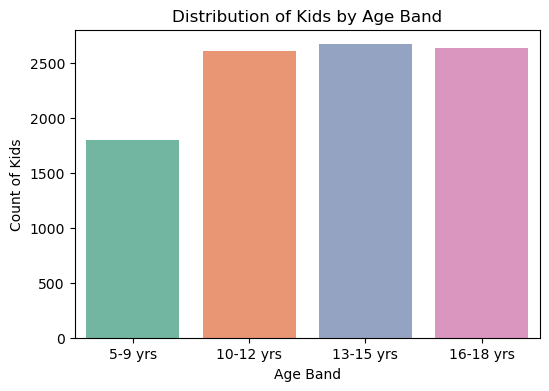

In [13]:
#Age Band Distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Age_Band", data=df, hue="Age_Band", palette="Set2", legend=False)
plt.title("Distribution of Kids by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count of Kids")
plt.show()

In [14]:
#Device Share (Proportion of each device used)
# Count device usage and calculate share
device_share = df["Primary_Device"].value_counts(normalize=True) * 100
print("Device Share(% of kids using each device):\n", device_share, "\n")

Device Share(% of kids using each device):
 Primary_Device
Smartphone    47.034596
TV            25.607496
Laptop        14.754942
Tablet        12.602965
Name: proportion, dtype: float64 



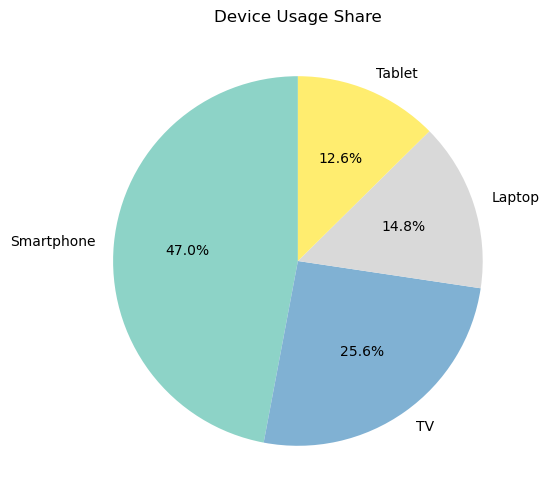

In [15]:
#Device Share
plt.figure(figsize=(6,6))
device_share.plot(kind="pie", autopct="%.1f%%", startangle=90, colormap="Set3")
plt.title("Device Usage Share")
plt.ylabel("")
plt.show()

In [16]:
# Activity Share
df["Educational_Share"] = df["Educational_to_Recreational_Ratio"]
df["Recreational_Share"] = 1 - df["Educational_to_Recreational_Ratio"]
print("Sample with Activity Shares:\n", df.head(), "\n")

Sample with Activity Shares:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural   Age_Band  Educational_Share  \
0  Poor Sleep, Eye Strain          Urban  13-15 yrs               0.42   
1              Poor Sleep          Urban  10-12 yrs       

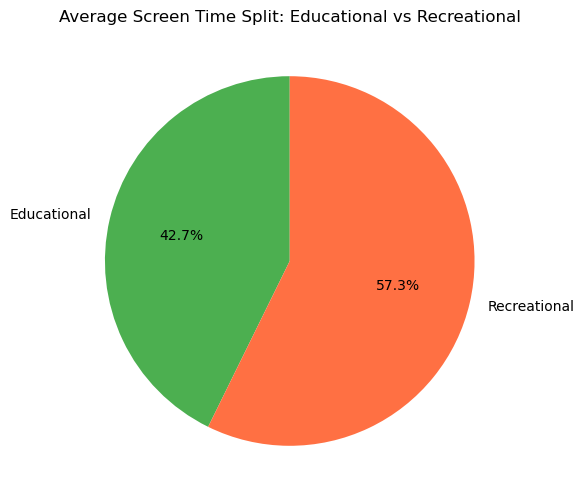

In [36]:
# Educational vs Recreational Share
avg_activity_share = {
    "Educational": df["Educational_Share"].mean() * 100,
    "Recreational": df["Recreational_Share"].mean() * 100
}

plt.figure(figsize=(6,6))
plt.pie(avg_activity_share.values(), labels=avg_activity_share.keys(),
        autopct="%.1f%%", startangle=90, colors=["#4CAF50", "#FF7043"])
plt.title("Average Screen Time Split: Educational vs Recreational")
plt.show()

## Save Preprocessed data for reuse

In [18]:
# Save Preprocessed Dataset
df.to_csv("Indian_Kids_Screen_Time_Preprocessed.csv", index=False)

print("Preprocessed dataset saved successfully!")

Preprocessed dataset saved successfully!


## OBSERVATIONS

In [ ]:
1. Fisrt load the dataset.
2. Check for null values in each column. I found 3218 null values present in Health_Impacts Categorical Column.
3. Handle these null values with mode(most frequent) values.
4. Then we create Age_Band Column By grouping of Age(Age Column) in ["5-9 yrs", "10-12 yrs", "13-15 yrs", "16-18 yrs"].
5. After that I calculate the device share of Kids, Then I found Smartphone 47%, TV 25.6%, Laptop 14.7% and Tablet 12.6% used By Kids.
6. After that I also Calculate the Activity Share of Kids, Then I found 42.7% of Time used in Education and 57.3% of time used in Recreational.
7. Saved the updated dataset for further analysis.